In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment

In [2]:
iris_data = pd.read_excel('/content/iris.xls')

In [3]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.shape

(150, 5)

# 2. Do the necessary pre-processing steps

### 1.   Checking missing values for the columns 'SL','SW and 'PL'



In [7]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
iris_data.duplicated().sum()

3

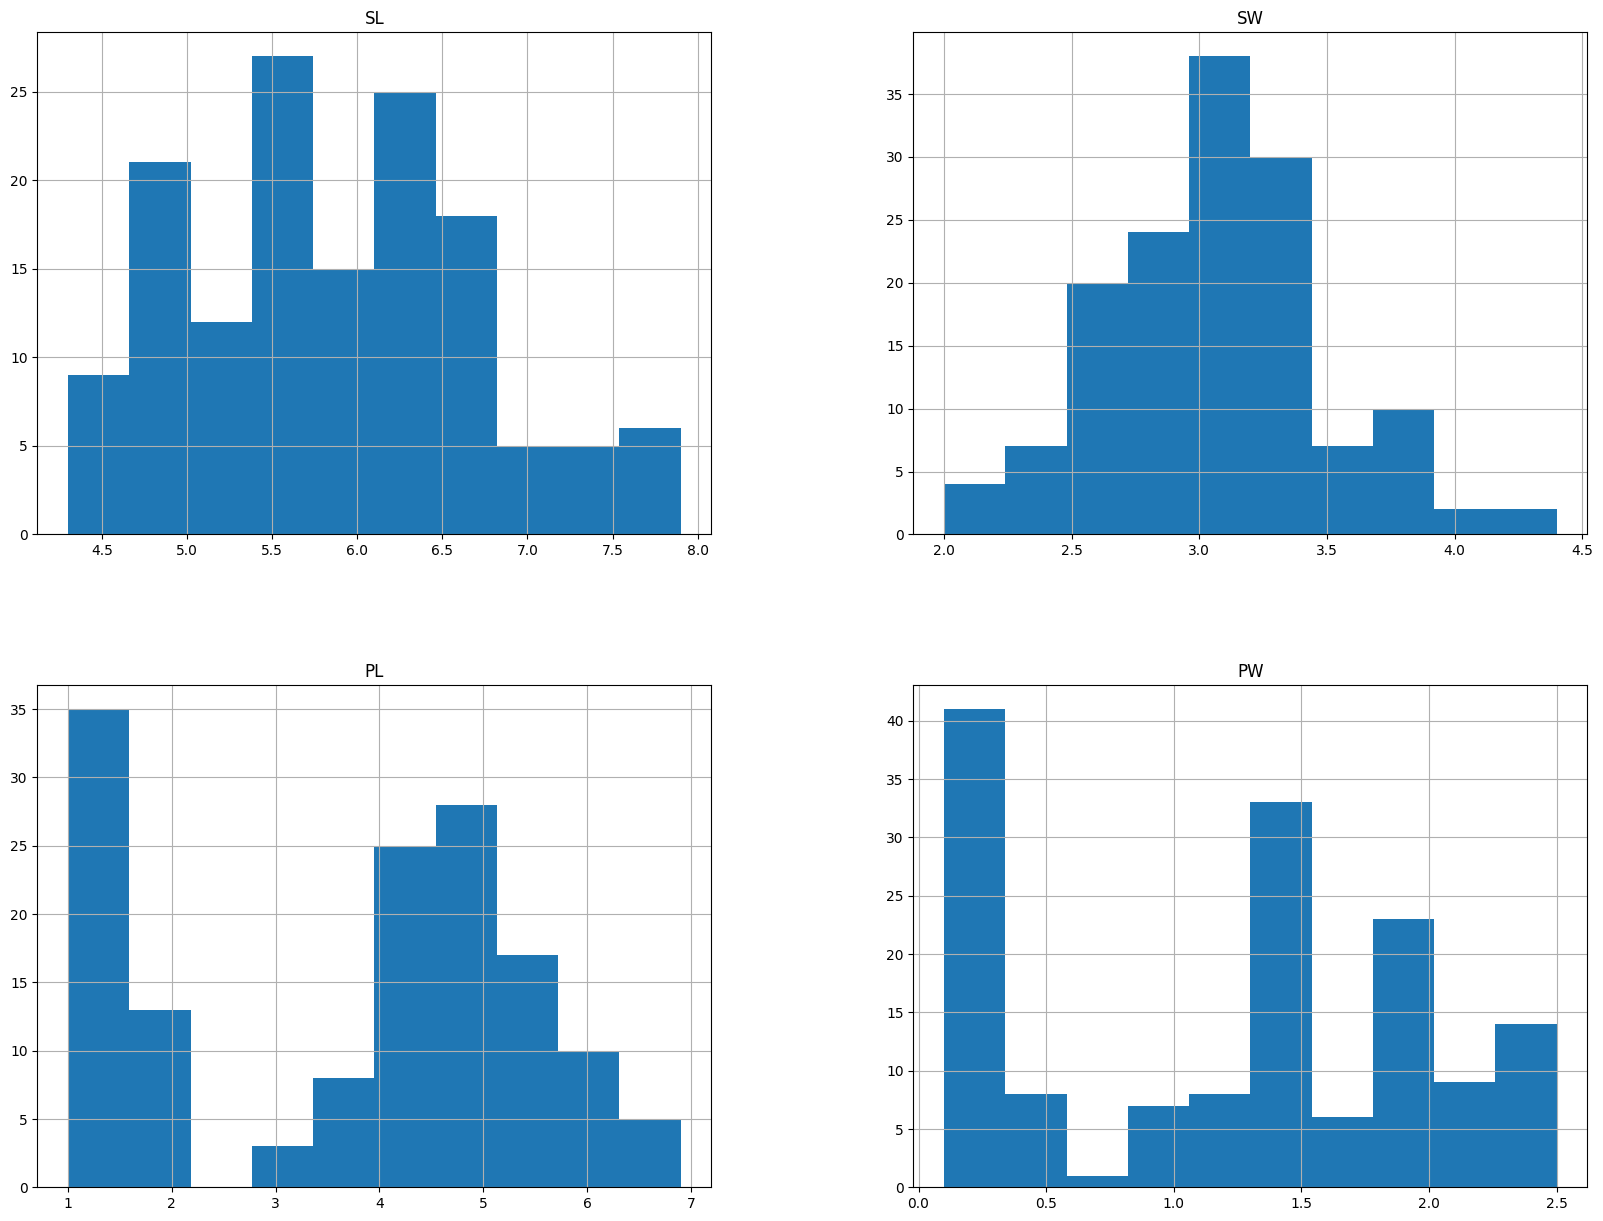

In [9]:
freqgraph = iris_data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

### *Using the ‘fillna’ method for imputing the column 'SL' with the median value. (The median is the middlemost value)*

In [10]:
iris_data['SL']= iris_data['SL'].fillna(iris_data['SL'].median())
iris_data['SW']= iris_data['SW'].fillna(iris_data['SW'].median())
iris_data['PL']= iris_data['PL'].fillna(iris_data['PL'].median())

In [11]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### 2.   Outlier Handling for the columns 'SL','SW and 'PL'


Text(0.5, 1.0, 'Boxplot of SL')

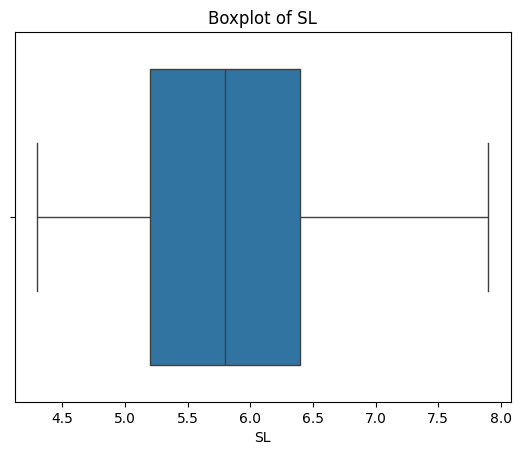

In [12]:
#   Boxplot of the SL, SW and PL variables before outlier treatment.
sns.boxplot(x=iris_data['SL'],data=iris_data)
plt.title('Boxplot of SL')

Text(0.5, 1.0, 'Boxplot of SW')

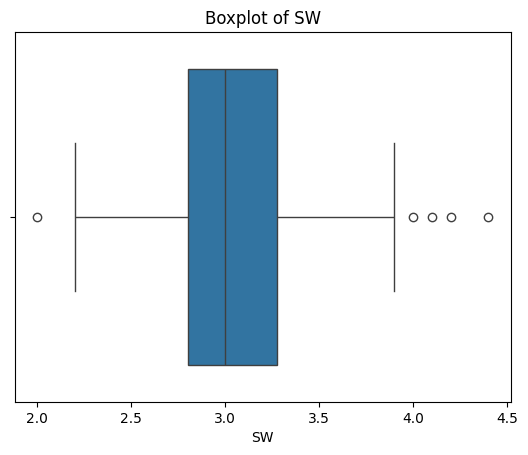

In [13]:
sns.boxplot(x=iris_data['SW'],data=iris_data)
plt.title('Boxplot of SW')

Text(0.5, 1.0, 'Boxplot of PL')

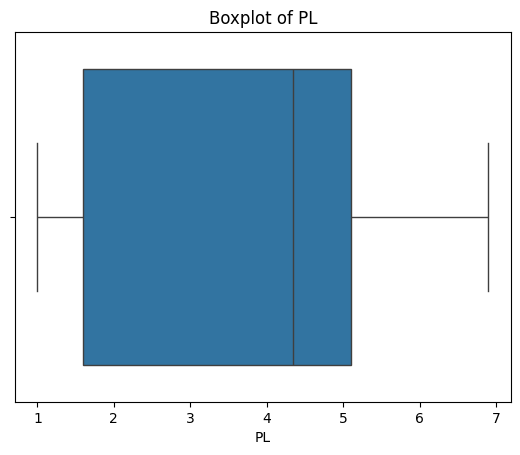

In [14]:
sns.boxplot(x=iris_data['PL'],data=iris_data)
plt.title('Boxplot of PL')

Text(0.5, 1.0, 'Boxplot of PW')

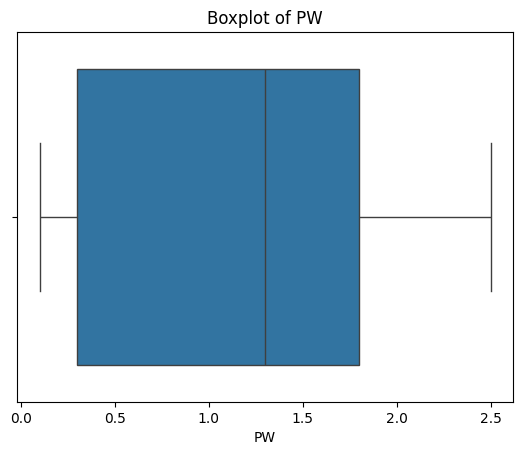

In [15]:
sns.boxplot(x=iris_data['PW'],data=iris_data)
plt.title('Boxplot of PW')

In [16]:
iris_data['SL'].skew()

0.3237869989034533

In [17]:
iris_data['SW'].skew()

0.3992861923982765

In [18]:
iris_data['PL'].skew()

-0.3125678285137702

In [19]:
iris_data['PW'].skew()

-0.10499656214412734

The range of skewness is:

-0.5 to 0.5: Normally skewed distribution

-0.5 to -1: Negatively skewed distribution

0.5 to 1: Positively skewed distribution

Inference :  While checking the skewness, we can see that, SL, SW and PL has normal skewness which indicates a Normally skewed distribution

### *However a skewness value of 0.399 indicates a slight skew towards one tail of the distribution. So we are adopting the 'Interquartile range (IQR) method' for handling outliers for the field SW*

In [20]:
#    calculating the interquartile range value of the ‘SW’ variable
Q1=iris_data['SW'].quantile(0.25)
Q3=iris_data['SW'].quantile(0.75)
print('Q1 : ',Q1)
print('Q3 : ',Q3)

Q1 :  2.8
Q3 :  3.275


In [21]:
IQR=Q3-Q1
print('IQR :', IQR)

IQR : 0.4750000000000001


In [22]:
low_lim = Q1 - 1.5*IQR
up_lim  = Q3 + 1.5*IQR
print("Lower value: ",low_lim)
print("Upper value: ",up_lim)

Lower value:  2.0874999999999995
Upper value:  3.9875



### we can identify any values which are above 3.9875 or below 2.087 as outliers

In [23]:
outliers =[]
for x in iris_data['SW']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [24]:
#       Handling the outliers using the clip function
iris_data['SW'] = iris_data['SW'] .clip(lower=low_lim ,upper=up_lim)

In [25]:
outliers =[]
for x in iris_data['SW']:
  if((x < low_lim) or (x > up_lim)):
    outliers.append(x)
print(outliers)

[]


<Axes: xlabel='SW'>

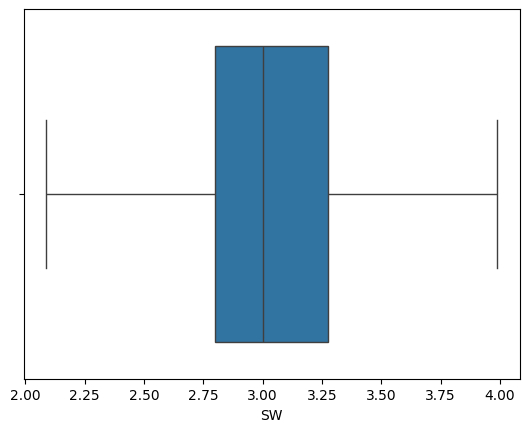

In [26]:
#   Boxplot of the ‘SW’ variable after outlier treatment.
sns.boxplot(x=iris_data['SW'],data=iris_data)

### Outliers are handled

# Correlation Matrix

In [27]:
# display the correlation matrix
iris_data.corr()

<ipython-input-27-945a59ab93dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,SL,SW,PL,PW
SL,1.000000,-0.099876,0.830554,0.800939
SW,-0.099876,1.000000,-0.403874,-0.336623
PL,0.830554,-0.403874,1.000000,0.936089
PW,0.800939,-0.336623,0.936089,1.000000


<ipython-input-28-7806fd8d4e78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_data.corr()
<ipython-input-28-7806fd8d4e78>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_data.corr(), annot=True, cmap="YlGnBu");


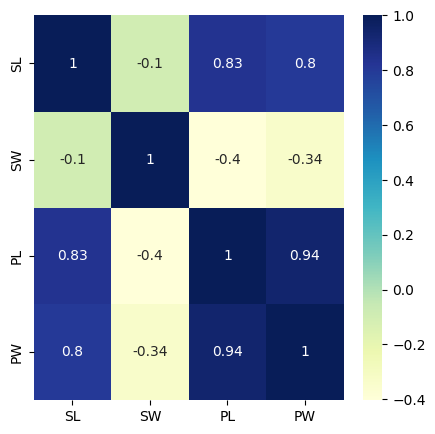

In [28]:
corr = iris_data.corr()
#  Creating a heatmap to visualize the correlation matrix of DataFrame iris
plt.figure(figsize=(5,5))
sns.heatmap(iris_data.corr(), annot=True, cmap="YlGnBu");
plt.show()

Inference :

*   Petal length and petal width have high positive correlation of 0.94. If petal length value increases, petal width also increases

*   Sepal length have high positive correlation with petal length and petal width


*   Sepal width have high negative correlation with petal length and petal width












# Feature Scaling

In [29]:
# Importing libraries for Train-test split
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = iris_data.drop('Classification', axis=1)
y = iris_data['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

# Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
# transform the string labels to integer
iris_data['Classification'] = lab_enc.fit_transform(iris_data['Classification'])
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Scaling

In [31]:
iris_data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.042917,3.780000,1.198667,1.000000
std,0.808567,0.407291,1.729424,0.763161,0.819232
min,4.300000,2.087500,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,3.987500,6.900000,2.500000,2.000000


In [32]:
# importing libraries for Label encoding and Scaling
from sklearn.preprocessing import StandardScaler

In [33]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Find out which classification model gives the best result

## Model Traning



## 1.   Logistic Regression



In [34]:
# Importing Confusion Matrix Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
# Importing LogisticRegression Libraries
from sklearn.linear_model import LogisticRegression

In [36]:
#  Trying the Logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
# Predicting
log_pred = log_reg.predict(X_test_scaled)
accuracy_score(log_pred, y_test)

0.9736842105263158



## 2.   K-Nearest Neighbors



In [37]:
# Importing KNeighborsClassifier Libraries
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#  Trying the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
knn.fit(X_train_scaled, y_train)
# Predicting
knn_pred = knn.predict(X_test_scaled)
accuracy_score(knn_pred, y_test)

1.0



## 3.   Support Vector Classifier



In [39]:
# Importing Support Vector Classifier Libraries
from sklearn.svm import SVC

In [40]:
#  Trying the Support Vector Classifier
svc = SVC()
svc.fit(X_train_scaled, y_train)
# Predicting
svc_pred = svc.predict(X_test_scaled)
accuracy_score(svc_pred, y_test)

0.9736842105263158



## 4.   Decision Tree




In [41]:
# Importing Decision Tree Libraries
from sklearn.tree import DecisionTreeClassifier

In [42]:
#  Trying the Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
# Predicting
dt_pred = dt.predict(X_test_scaled)
accuracy_score(dt_pred, y_test)

1.0

## 5.   Random Forest

In [43]:
# Importing Random Forest Libraries
from sklearn.ensemble import RandomForestClassifier

In [44]:
#  Trying the Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
# Predicting
rf_pred = rf.predict(X_test_scaled)
accuracy_score(rf_pred, y_test)

1.0

In [45]:
#    Displaying the accuracy scores altogether
acc_matrix = [accuracy_score(log_pred, y_test),
              accuracy_score(knn_pred, y_test),
              accuracy_score(svc_pred, y_test),
              accuracy_score(dt_pred, y_test),
              accuracy_score(rf_pred, y_test)]
acc_matrix

[0.9736842105263158, 1.0, 0.9736842105263158, 1.0, 1.0]

# Model Evaluation

In [46]:
#   checking confusion matrix for Logistic Regression
confusion_matrix(y_test,log_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [47]:
#   checking confusion matrix for KNeighbors Classifier
confusion_matrix(y_test, knn_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [48]:
#   checking confusion matrix for Support Vector Classifier
confusion_matrix(y_test, svc_pred)

array([[15,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [49]:
#   checking confusion matrix for Decision Tree Classifier
confusion_matrix(y_test, dt_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [50]:
#   checking confusion matrix for Random Forest Classifier
confusion_matrix(y_test, rf_pred)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

# Entire Model Prediction

In [51]:
log_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [52]:
knn_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [53]:
svc_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [54]:
dt_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [55]:
rf_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

### Inferences :

### 1. KNN, Decision Tree and Random forest algorithms gives best accuracy here.

### Logistic Regression and SVC (Support Vector Classifier) have slightly lower accuracy scores but are still high.


### 2. But accuracy changes based on selection of test data and random state.


### 3. Considering factors like interpretability, computational efficiency, and robustness alongside accuracy, Decision Tree model is the best choice.


### 4. Random Forest is best algorithm because KNN models's accuracy changes for differant k values.


### 5. If you need a more complex model or if interpretability is not a concern, Random Forest could be a good choice


### 6. We need to determine K value and the computation time is also high for KNN. Also KNN models's accuracy changes for differant k values.


# Conclusion : We can select Decision Tree/Random Forest based on the inferences